(3508, 2479)


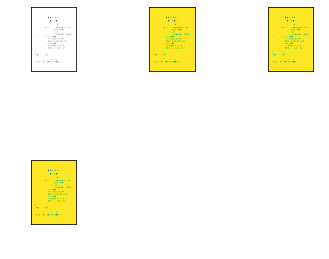

In [85]:
from turtle import color
import cv2
import matplotlib
from PIL import Image
import pytesseract
from tqdm import tqdm
from pathlib import Path
import imutils
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from wand.image import Image as wi
from tempfile import TemporaryDirectory

def image_to_gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def image_to_binary(image):
    binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    return binary_image

def image_to_mean_binary(image):
    binary_image_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 100)
    return binary_image_mean


file_path = Path('./page_001.jpg')
img = cv2.imread(str(file_path), cv2.IMREAD_COLOR)
plt.subplot(3,3,1)
plt.xticks([]), plt.yticks([])
plt.imshow(img), plt.xlabel('color', color="white", fontsize=20)

gray_image = image_to_gray(img)
print(gray_image.shape)
plt.subplot(3,3,2)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_image), plt.xlabel('gray', color="white", fontsize=20)
cv2.imwrite('./gray.jpg', gray_image)

binary_image = image_to_binary(gray_image)
plt.subplot(3,3,3)
plt.xticks([]), plt.yticks([])
plt.imshow(binary_image), plt.xlabel('binary', color="white", fontsize=20)
cv2.imwrite('./binary.jpg', binary_image)

binary_image_mean = image_to_mean_binary(gray_image)
plt.subplot(3,3,7)
plt.xticks([]), plt.yticks([])
plt.imshow(binary_image_mean), plt.xlabel('binary_m', color="white", fontsize=20)
cv2.imwrite('./binary_mean.jpg', binary_image_mean)

binary_image_binary = image_to_binary(gray_image)
plt.subplot(3,3,7)
plt.xticks([]), plt.yticks([])
plt.imshow(binary_image_binary), plt.xlabel('binary_m', color="white", fontsize=20)
cv2.imwrite('./binary_binary.jpg', binary_image_binary)


with open('./binary.txt', 'a') as output_file:
    text = str(
        (
            pytesseract.image_to_string(
                Image.open('./binary.jpg'), lang="eng+kor"
            )
        )
    )
    output_file.write(text)


In [88]:
import easyocr

reader = easyocr.Reader(['en', 'ko'], gpu=True)

result = reader.readtext('./binary.jpg', detail = 0)
result2 = reader.readtext('./page_001.jpg', detail = 0)
print(result)
print(result2)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/python3.8/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


['대 구 지 방  법 원', '제 1 1 형 사 부', '판', '결', '사', '건', '20j0j7고탑 449', '가  특정경 제범죄가중처 벌등에관한법률위반(배임 )', '(인정된', '죄명', '업무상배임 ]', '나   업무상배임', '다   부정 경쟁방지및 영 업비밀 보로에관한법 률위반', '피   고  인', '1,가다  00O (1955년생)', '주거', '부산 남구 몸로돈 (번지 이하 생락j', '틈록기 준지', '인천', '부평구   부평동 (번지  생락]', '2,나다  이스4 (1958년생)', '주거', '포랑지', '남구 인덕동 (번지', '이하 생락}', '틈록기 준지', '제주지', '건입동 (번지', '생락]', '검', '자', '김종근', '변   호 인', '생락', '판 곁 선 고', 'Zjrj8,', '4', '8,', '주', '문', '피고인', '1클 징역 3년에, 피고인', '2틀 징역 1년', 'h월에 각 처한다 ,']
['대 구 지 방 법 원', '제 1 1 형 사 부', '판', '결', '사', '건', '2jj7고맙449', '가  특정경 제범죄가죽처 벌등에관한법률위반 (배임 ', '(인정된 죄명', '업무상배임 ]', '나   업무상배임', '다   부정 경쟁방지및 영 업비밀 보로에관한법 률위반', '피   고  인', '1,가다', '이OC (1955년생)', '주거', '부산 남구 몸료톱 (번지 이하 생략]', '틈록기 준지', '인천', '부평구   부평동 (번지   생락]', '2,나다  이스4 (1958년생)', '주거', '포함시   남구 인덕동 (번지  이하 생락]', '틈록기 준지', '제주지', '건입동 (번지   생락)', '검', '자', '김종근', '변   호 인', '생락', '판 결 선 고', '2jj8', '4', '8', '주', '문', '피고인', '1클 징역 3년에; 피고인 2v 징역 1년', 'b물에 각 처한다 ,']


In [4]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)
    
implicit()

ImportError: cannot import name 'storage' from 'google.cloud' (unknown location)